In [1]:
# ###################################################
# Change current directory to the root of the project
import os
from pathlib import Path
current_dir = Path(os.getcwd())
os.chdir(current_dir.parents[1])
# ###################################################

In [2]:
import torchvision.transforms as transforms
from omegaconf.omegaconf import OmegaConf
from hyper_cl.benchmarks.avl_benchmarks import get_benchmark

### Define networks

In [3]:
config = {"input_size": 32,
          "benchmark": "scifar100",
          "bnch_params": {"n_experiences": 20},
          "seed": 0
          }

config = OmegaConf.create(config)
print(config.input_size)

32


In [4]:
# List of datasets: Aircraft, CIFAR-10, D.Textures, GTSRB, FashionMNIST, SVHN, Flowers102, StanfordCars, OxfordIIITPet, Food-101
benchmark = get_benchmark(config)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
to_image_norm = transforms.Compose(
    [transforms.Normalize((-0.5071/0.2673, -0.4865/0.2564, -0.4409/0.2762), (1./0.2673, 1./0.2564, 1./0.2762)),
    transforms.ToPILImage(),
     transforms.Resize(256)
     ]
)

In [12]:
new_transform = transforms.Compose(
            [
                transforms.RandomCrop(32, padding=4),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                # transforms.RandomSolarize(0.5, p=1.0),
                # transforms.RandomPerspective(distortion_scale=0.5, p=1.0,),
                # transforms.GaussianBlur(kernel_size=5, sigma=(0.9, 0.9)),
                transforms.RandomAutocontrast(p=1.0),
                # transforms.Grayscale(num_output_channels=3),
                transforms.GaussianBlur(kernel_size=3, sigma=(0.6, 0.7)),
                transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2762)),
                transforms.Resize(config.input_size),
            ]
        )
dataset = benchmark.train_stream[0].dataset.replace_current_transform_group(new_transform)

Label:  43 , Task ID:  0


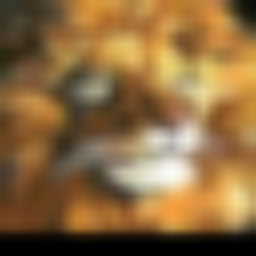

In [13]:
x, y, t = dataset[4]
print("Label: ", y, ", Task ID: ", t)
to_image_norm(x)
